In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from tqdm import tqdm
from sklearn import impute
from sklearn import compose
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Name: Shaked Shoshan
# ID: 208140111
# Kaggle user name: shakedshoshan

https://www.kaggle.com/shakedshoshan

# TL;DR
In this work I will analyze the data and decide which one is more important and which one is less. I will delete what I don't see fit. After that I will look for gaps in the data and fill in the gaps with an average. I will encode the data that is strings to numbers so that the model works more efficiently and finally I will run two models that we learned to distinguish which gets a higher result.

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Essential Data Analysis**

**total survivors**

In [5]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

px.histogram(train_data, x='Survived')

**survivle depand on gender**

In [6]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [7]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [8]:
px.histogram(train_data, x = 'Sex', color = 'Survived')

grafic presentation about survivors.
It is easy to notice that girls survived in a significantly higher percentage than boys. The height of this feature is important

**survivle depand on Pclass**

In [9]:
p1 = train_data.loc[train_data.Pclass == 1]["Survived"]
rate_p1 = sum(p1)/len(p1)
p2 = train_data.loc[train_data.Pclass == 2]["Survived"]
rate_p2 = sum(p2)/len(p2)
p3 = train_data.loc[train_data.Pclass == 3]["Survived"]
rate_p3 = sum(p3)/len(p3)


print("% of p1 who survived:", rate_p1)

print("% of p2 who survived:", rate_p2)

print("% of p3 who survived:", rate_p3)

% of p1 who survived: 0.6296296296296297
% of p2 who survived: 0.47282608695652173
% of p3 who survived: 0.24236252545824846


In [10]:
px.histogram(train_data, x = 'Pclass', color = 'Survived')

**survlvle depend on age**

In [11]:
px.histogram(train_data, x = 'Age', color = 'Survived')

survivle depand on siblins

In [12]:
px.histogram(train_data, x = 'SibSp', color = 'Survived')

In [13]:
#add family member feature
train_data["FamilyMem"] = train_data["SibSp"] + train_data["Parch"]
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyMem
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


**new feature: title**

In [14]:
def extract_title(name):
    return name.split(",")[1].split(".")[0].strip()

train_data['Title'] = train_data['Name'].apply(extract_title)

# Group less frequent titles into a single category 'Rare'
title_counts = train_data['Title'].value_counts()
rare_titles = title_counts[title_counts < 10].index.tolist()
train_data['Title'] = train_data['Title'].replace(rare_titles, 'Rare')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyMem,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr


In [15]:
px.histogram(train_data, x = 'Title', color = 'Survived')

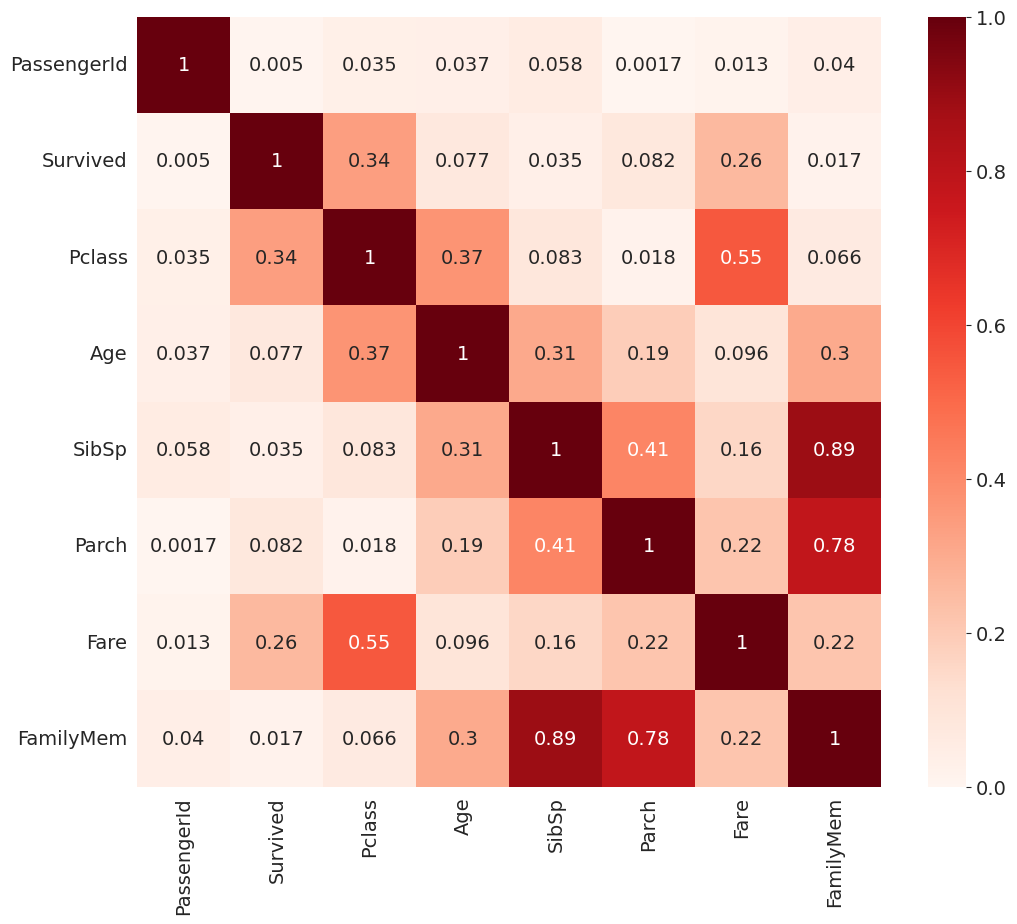

In [16]:
plt.figure(figsize=(12,10))
cor = np.abs(train_data.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=0, vmax=1)
plt.show()

**Conclusions:**
1. Girls survived significantly more than boys
2. People who stayed in department 1 survived in higher percentages than the other departments. Whereas people from class 3 survived, the percentages are low.
3. It seems that there is little importance for the inventions of family members and the chance of survival because people with one family member survived in the highest percentages.
4. It can be observed that people in their mid-20s survived longer. But small children up to the age of six managed to survive the best. Apparently they were given priority in the rescue.

# Addressing Missing Value


In [17]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilyMem        0
Title            0
dtype: int64

drop Ticket, Cabin, PassengerID and Name cols as they dont directly contribute to Survival rate.
Cabin col contain lot of null value.
Lets fill the age col with median of the col and Embarked with mode of the col.

In [18]:
def missing_value(df):
    df = df.drop(['Ticket', 'Cabin','PassengerId','Name','SibSp','Parch'], axis = 1)
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    #df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
    return df

train_data = missing_value(train_data)
train_data

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilyMem,Title
0,0,3,male,22.0,7.2500,S,1,Mr
1,1,1,female,38.0,71.2833,C,1,Mrs
2,1,3,female,26.0,7.9250,S,0,Miss
3,1,1,female,35.0,53.1000,S,1,Mrs
4,0,3,male,35.0,8.0500,S,0,Mr
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,0,Rare
887,1,1,female,19.0,30.0000,S,0,Miss
888,0,3,female,28.0,23.4500,S,3,Miss
889,1,1,male,26.0,30.0000,C,0,Mr


In [19]:
train_data.isna().sum()

Survived     0
Pclass       0
Sex          0
Age          0
Fare         0
Embarked     0
FamilyMem    0
Title        0
dtype: int64

 Get Dummies Encode of Categorical Col


# **Build Model**

**Standart scaler for numerical features**

In [20]:
#scaler = StandardScaler()

#numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
#numerical_cols = numerical_cols.drop(['Pclass'])
#scaler.fit(train_data['Age', 'Fare'])
#train_data['Age', 'Fare'] = scaler.transform(train_data['Age', 'Fare'])

#numerical_cols

In [21]:
#dummy encode
from sklearn.preprocessing import OneHotEncoder
def dummy_encode(df, columns_names):
    df_cat = df[columns_names]
    enc = OneHotEncoder(drop='first', sparse=False)
    df_cat_enc = pd.DataFrame(enc.fit_transform(df_cat))
    df_enc = df.drop(columns_names, axis=1).join(df_cat_enc)
    return df_enc


train_data_enc_dummy = pd.get_dummies(train_data, columns=['Pclass', 'Sex','Embarked','Title'], prefix=["Pclass_type_is","Sex_type_is","Embarked_type_is","Title_type_is"], drop_first=True)

train_data_enc_dummy

,Survived,Age,Fare,FamilyMem,Pclass_type_is_2,Pclass_type_is_3,Sex_type_is_male,Embarked_type_is_Q,Embarked_type_is_S,Title_type_is_Miss,Title_type_is_Mr,Title_type_is_Mrs,Title_type_is_Rare
0,0,22.0,7.2500,1,0,1,1,0,1,0,1,0,0
1,1,38.0,71.2833,1,0,0,0,0,0,0,0,1,0
2,1,26.0,7.9250,0,0,1,0,0,1,1,0,0,0
3,1,35.0,53.1000,1,0,0,0,0,1,0,0,1,0
4,0,35.0,8.0500,0,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,0,1,0,1,0,1,0,0,0,1
887,1,19.0,30.0000,0,0,0,0,0,1,1,0,0,0
888,0,28.0,23.4500,3,0,1,0,0,1,1,0,0,0
889,1,26.0,30.0000,0,0,0,1,0,0,0,1,0,0


new heat map, after the encod, drop (unnecesey features) and fiil null collums

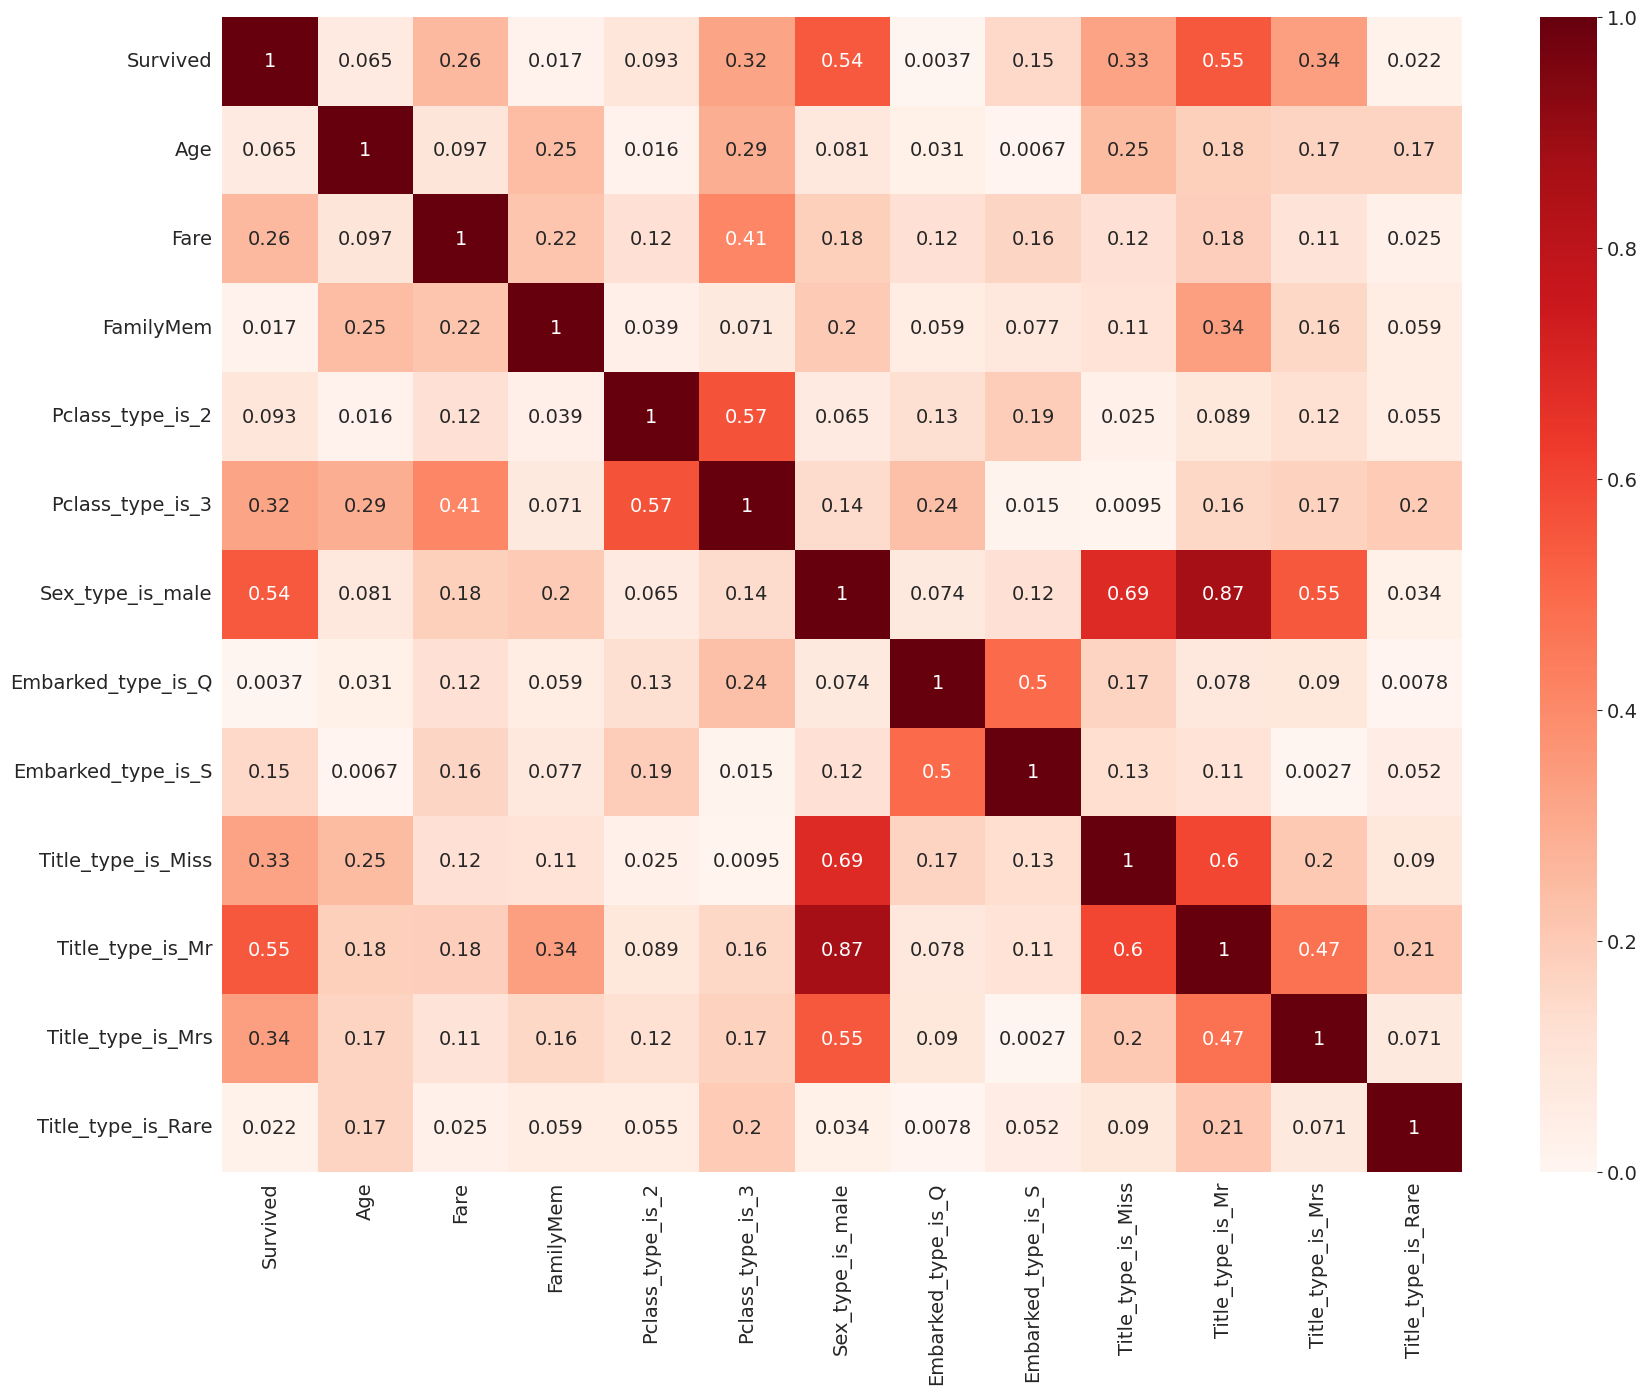

In [22]:
plt.figure(figsize=(20,15))
cor = np.abs(train_data_enc_dummy.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=0, vmax=1)
plt.show()

**Conclusions from the new heat table:**
The most important parameters for the probability of a person to survive are: sex, Pclass and rate.
It can be observed that there is a relatively strong relationship between the rate and the department.

In [23]:
#dummy encode
X_train = train_data_enc_dummy.drop(['Survived'], axis =1)
y_train = train_data_enc_dummy['Survived']

In [24]:
#LogisticRegression model
"""""
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=42, solver = 'liblinear')
model1.fit(X_train, y_train)
model1.score(X_train, y_train)
"""""

'""\nfrom sklearn.linear_model import LogisticRegression\nmodel1 = LogisticRegression(random_state=42, solver = \'liblinear\')\nmodel1.fit(X_train, y_train)\nmodel1.score(X_train, y_train)\n'

In [25]:
#SGDClassifier model
"""""
from sklearn.linear_model import SGDClassifier
model2 = SGDClassifier(random_state=42)
model2.fit(X_train, y_train)
model2.score(X_train, y_train)
"""""

'""\nfrom sklearn.linear_model import SGDClassifier\nmodel2 = SGDClassifier(random_state=42)\nmodel2.fit(X_train, y_train)\nmodel2.score(X_train, y_train)\n'

**conclution:**
for that titanic problem we prefer to use logistic regression model

# **Test set Prediction**


In [26]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [27]:
test_data["FamilyMem"] = test_data["SibSp"] + test_data["Parch"]

test_data['Title'] = test_data['Name'].apply(extract_title)

# Group less frequent titles into a single category 'Rare'
title_counts = test_data['Title'].value_counts()
rare_titles = title_counts[title_counts < 10].index.tolist()
test_data['Title'] = test_data['Title'].replace(rare_titles, 'Rare')

test_data = missing_value(test_data)
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

test_data


,Pclass,Sex,Age,Fare,Embarked,FamilyMem,Title
0,3,male,34.5,7.8292,Q,0,Mr
1,3,female,47.0,7.0000,S,1,Mrs
2,2,male,62.0,9.6875,Q,0,Mr
3,3,male,27.0,8.6625,S,0,Mr
4,3,female,22.0,12.2875,S,2,Mrs
...,...,...,...,...,...,...,...
413,3,male,27.0,8.0500,S,0,Mr
414,1,female,39.0,108.9000,C,0,Rare
415,3,male,38.5,7.2500,S,0,Mr
416,3,male,27.0,8.0500,S,0,Mr


In [28]:
test_data.isna().sum()

Pclass       0
Sex          0
Age          0
Fare         0
Embarked     0
FamilyMem    0
Title        0
dtype: int64

In [29]:
test_data_enc_dummy = pd.get_dummies(test_data, columns=['Pclass', 'Sex','Embarked','Title'], prefix=["Pclass_type_is","Sex_type_is","Embarked_type_is","Title_type_is"], drop_first=True)
test_data_enc_dummy

,Age,Fare,FamilyMem,Pclass_type_is_2,Pclass_type_is_3,Sex_type_is_male,Embarked_type_is_Q,Embarked_type_is_S,Title_type_is_Miss,Title_type_is_Mr,Title_type_is_Mrs,Title_type_is_Rare
0,34.5,7.8292,0,0,1,1,1,0,0,1,0,0
1,47.0,7.0000,1,0,1,0,0,1,0,0,1,0
2,62.0,9.6875,0,1,0,1,1,0,0,1,0,0
3,27.0,8.6625,0,0,1,1,0,1,0,1,0,0
4,22.0,12.2875,2,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,27.0,8.0500,0,0,1,1,0,1,0,1,0,0
414,39.0,108.9000,0,0,0,0,0,0,0,0,0,1
415,38.5,7.2500,0,0,1,1,0,1,0,1,0,0
416,27.0,8.0500,0,0,1,1,0,1,0,1,0,0


In [30]:
#predict_LogisticRegression = model1.predict(test_data_enc_dummy)
#predict_SGDClassifier = model2.predict(test_data_enc_dummy)

**conclution:** after submitting the two models i got a better score on "model1" - logistic regressition

# **In conclusion:**
After data analysis I decided to delete the items: cabin, name, PassengerID ticket. in addition i add two more features, family size and title of a person to improve my model.
I had to perform coding for data that was not numeric (embarked, sex, Pclass) by dummy encoding. I tested both ordinary and ONE hot coding, but they brought less good results. After that I ran the two models we studied, SGD and logistic regression. The conclusion after running them that logistic regression is better .

# **Ex 3**

**try to use KNN, NBC or LDA**

In [31]:
#KNN
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train, y_train)
print("KNN model score: ", KNN_model.score(X_train, y_train))

# NBC
NBC_model = GaussianNB()
NBC_model.fit(X_train, y_train)
print("NBC model score: ", NBC_model.score(X_train, y_train))

# LDA
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
print("LDA model score: ", LDA_model.score(X_train, y_train))


KNN model score:  0.8496071829405163
NBC model score:  0.7800224466891134
LDA model score:  0.835016835016835


**conclution:**it look like the KNN and LDA are the best models for that data

# **Cross validation**

In [32]:
# find generator length
from tqdm.auto import tqdm

def find_generator_len(generator, use_pbar=True):
    i = 0
    
    if use_pbar:
        pbar = tqdm(desc='Calculating Length',
                    ncols=1000,
                    bar_format='{desc}{bar:10}{r_bar}')

    for a in generator:
        i += 1

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    return i

In [33]:
# calculate score and loss from cv (KFold or LPO) and display graphs
def get_cv_score_and_loss(X, t, model, transformer=None,
                          k=None, p=None,
                          show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=42)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    if use_pbar:
        pbar = tqdm(desc='Computing Models',
                    total=find_generator_len(cv.split(X)))

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        scores_losses_df.loc[len(scores_losses_df)] =\
         [i, 'train', model.score(X_train, t_train),
          mean_squared_error(t_train, y_train)]
        scores_losses_df.loc[len(scores_losses_df)] =\
         [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, y_val)]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()

    return mean_val_score, mean_val_loss,\
     mean_train_score, mean_train_loss

In [34]:
print("KNN")
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X_train, y_train,
                       KNeighborsClassifier(n_neighbors=3),k=12, show_score_loss_graphs=True)

KNN


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/12 [00:00<?, ?it/s]

**conclution : **for KNN model the best kfold is 9

In [35]:
print("LDA")
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X_train, y_train,
                       LinearDiscriminantAnalysis(),k=12,show_score_loss_graphs=True )

LDA


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/12 [00:00<?, ?it/s]

**conclution :**for LDA model the best kfold is 10

In [36]:
print("NBC")
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(X_train, y_train,
                       GaussianNB(),k=12, show_score_loss_graphs=True)

NBC


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/12 [00:00<?, ?it/s]

**conclution :**for NBC model the best kfold is 10

# **Hyper-Parameters Search**

In [37]:
#search hyper parameters for KNN model

hyper_parameters = {'n_neighbors' : list(range(1, 20)),
                    'algorithm' : ('auto', 'ball_tree', 'kd_tree', 'brute'),
                    'p' : [1,2,3]}

KNN_model = GridSearchCV(
    KNeighborsClassifier(), hyper_parameters, cv = 9).fit(X_train, y_train)

print('Score for KNN Classification:')
print('best params', KNN_model.best_params_)

Score for KNN Classification:
best params {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1}


In [38]:
#search hyper parameters for LDA model

hyper_parameters = {'solver' : ['svd', 'lsqr', 'eigen']}

LDA_model = GridSearchCV(
    LinearDiscriminantAnalysis(), hyper_parameters, cv = 8).fit(X_train, y_train)

print('Score for LDA Classification:')
print('best params', LDA_model.best_params_)

Score for LDA Classification:
best params {'solver': 'svd'}


# **KPI**

**Confution Matrix Values:**
TP (True Positive) - The model classified correctly that a sample is positive.

TN (True Negative) - The model classified correctly that a sample is negative.

FP (False Positive) - The model classified a sample as positive but the sample is actually negative.

FN (False Negative) - The model classified a sample as negative but the sample is actually positive.


**KPI**

Precision: The percentage of correct positive predictions out of all the positive predictions.

Recall: The percentage of correct positive predictions out of all the actual positive samples.

Specificity: The percentage of correct negative predictions out of all the actual negative samples.

FPR: The percentage of mistaken negative predictions out of all the actual negative samples.

Accuracy: The percentage of correct predictions out of all the data.


In [39]:
def KPI_calc(model):
    y_train = model.predict(cv["X_train"])
    y_val = model.predict(cv['X_val'])
    cm_train = confusion_matrix(cv["t_train"], y_train)
    cm_val = confusion_matrix(cv['t_val'], y_val)
    
    print("confusion_matrix")

    print('cm_train')
    print(cm_train)
    print()
    print('cm_val')
    print(cm_val)

    tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
    tn_val, fp_val, fn_val, tp_val = cm_val.ravel()

    print(f'Train: TN {tn_train:4}, FP {fp_train:4}, FN {fn_train:4}, TP {tp_train:4}')
    print(f'Val:   TN {tn_val:4}, FP {fp_val:4}, FN {fn_val:4}, TP {tp_val:4}')

    # calculate precision, recall, specificity, fpr and accuracy
    print("KPI - precision, recall, specificity, fpr and accuracy")
    def precision(cm):
        tn, fp, fn, tp = cm.ravel()
        return tp/(tp+fp)

    def recall(cm):
        tn, fp, fn, tp = cm.ravel()
        return tp/(tp+fn)

    def specificity(cm):
        tn, fp, fn, tp = cm.ravel()
        return tn/(tn+fp)

    def fpr(cm):
        tn, fp, fn, tp = cm.ravel()
        return fp/(fp+tn)

    def accuracy(cm):
        tn, fp, fn, tp = cm.ravel()
        return (tp+tn)/(tp+tn+fp+fn)

    print(f'Train: precision {precision(cm_train):.2f}, recall {recall(cm_train):.2f}, specificity {specificity(cm_train):.2f}, fpr {fpr(cm_train):.2f}, accuracy {accuracy(cm_train):.2f}')
    print(f'Val:   precision {precision(cm_val):.2f}, recall {recall(cm_val):.2f}, specificity {specificity(cm_val):.2f}, fpr {fpr(cm_val):.2f}, accuracy {accuracy(cm_val):.2f}')

# **Feature Selection**

In [40]:
def featureSelection(model, train, target, val_data, val_target):
    ref_select = RFE(model, n_features_to_select=len(train.columns)).fit(train, target)
    ref_score = ref_select.score(val_data, val_target)
    
    for n in range(1, len(train.columns)):
        ref = RFE(model, n_features_to_select=len(train.columns)).fit(train, target)
        ref_score_test = ref.score(val_data, val_target)

        if ref_score_test > ref_score:
            ref_score = ref_score_test
            ref_select = ref
            
             
    return ref_select

In [41]:
def splitDataToKFold(X, t, k):
    cv = KFold(n_splits=k, shuffle=True, random_state=42)
    result = []
    
    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]
        
        result.append({"X_train": X_train
                      ,"t_train" : t_train
                      ,"X_val": X_val
                      ,"t_val": t_val
                      })
    return result
    
def margeCV(cv):
    X_train = []
    t_train = []    
    X_val = []
    t_val = []
    
    for i, d in enumerate(cv):
            X_train.append(d["X_train"])
            t_train.append(d["t_train"])
            
            X_val.append(d["X_val"])
            t_val.append(d["t_val"])
            
    X_train = pd.concat(X_train) 
    t_train = pd.concat(t_train) 
    X_val = pd.concat(X_val) 
    t_val = pd.concat(t_val) 
    
    return {"X_train": X_train,
            "t_train": t_train,
            "X_val": X_val,
            "t_val": t_val
            }

# KNN

In [42]:
# KNN selection
cv = splitDataToKFold(X_train, y_train, k=9)
cv = margeCV(cv)

KNN_model = KNeighborsClassifier(n_neighbors = KNN_model.best_params_['n_neighbors'] , algorithm = KNN_model.best_params_['algorithm'], p = 1)

KNN_model_fs = featureSelection(KNN_model, cv["X_train"], cv["t_train"], cv['X_val'], cv['t_val'])
KNN_model_fs.fit(cv["X_train"], cv["t_train"])
print("KNN model score: ", KNN_model_fs.score(X_train, y_train))

print("Optimal number of features in KNN: ", KNN_model_fs.n_features_)
X_train_select_KNN = X_train.columns[KNN_model_fs.support_]

print("Selected features: ", X_train_select_KNN)   


KNN model score:  0.9820426487093153
Optimal number of features in KNN:  12
Selected features:  Index(['Age', 'Fare', 'FamilyMem', 'Pclass_type_is_2', 'Pclass_type_is_3',
       'Sex_type_is_male', 'Embarked_type_is_Q', 'Embarked_type_is_S',
       'Title_type_is_Miss', 'Title_type_is_Mr', 'Title_type_is_Mrs',
       'Title_type_is_Rare'],
      dtype='object')


In [43]:
KPI_calc(KNN_model_fs)

confusion_matrix
cm_train
[[4312   80]
 [  48 2688]]

cm_val
[[539  10]
 [  6 336]]
Train: TN 4312, FP   80, FN   48, TP 2688
Val:   TN  539, FP   10, FN    6, TP  336
KPI - precision, recall, specificity, fpr and accuracy
Train: precision 0.97, recall 0.98, specificity 0.98, fpr 0.02, accuracy 0.98
Val:   precision 0.97, recall 0.98, specificity 0.98, fpr 0.02, accuracy 0.98


# LDA

In [44]:
# LDA selection
cv = splitDataToKFold(X_train, y_train, k = 9)
cv = margeCV(cv)

LDA_model = LinearDiscriminantAnalysis(solver = LDA_model.best_params_['solver'])

LDA_model = featureSelection(LDA_model, cv["X_train"], cv["t_train"], cv['X_val'], cv['t_val'])
print(LDA_model)
LDA_model.fit(cv["X_train"],cv["t_train"])
print("LDA model score: ", LDA_model.score(cv['X_val'], cv['t_val']))

print("Optimal number of features in LDA: ", LDA_model.n_features_)
X_train_select_LDA = X_train.columns[LDA_model.support_]

print("Selected features: ", X_train_select_LDA)  

RFE(estimator=LinearDiscriminantAnalysis(), n_features_to_select=12)
LDA model score:  0.835016835016835
Optimal number of features in LDA:  12
Selected features:  Index(['Age', 'Fare', 'FamilyMem', 'Pclass_type_is_2', 'Pclass_type_is_3',
       'Sex_type_is_male', 'Embarked_type_is_Q', 'Embarked_type_is_S',
       'Title_type_is_Miss', 'Title_type_is_Mr', 'Title_type_is_Mrs',
       'Title_type_is_Rare'],
      dtype='object')


In [45]:
KPI_calc(LDA_model)

confusion_matrix
cm_train
[[3920  472]
 [ 704 2032]]

cm_val
[[490  59]
 [ 88 254]]
Train: TN 3920, FP  472, FN  704, TP 2032
Val:   TN  490, FP   59, FN   88, TP  254
KPI - precision, recall, specificity, fpr and accuracy
Train: precision 0.81, recall 0.74, specificity 0.89, fpr 0.11, accuracy 0.84
Val:   precision 0.81, recall 0.74, specificity 0.89, fpr 0.11, accuracy 0.84


# NBC

In [46]:
# NBC selection
cv = splitDataToKFold(X_train, y_train, k = 10)
cv = margeCV(cv)

NBC_model = GaussianNB()

NBC_model = featureSelection(NBC_model, cv["X_train"], cv["t_train"], cv['X_val'], cv['t_val'])
print(NBC_model)
LDA_model.fit(cv["X_train"],cv["t_train"])
print("NBC model score: ", NBC_model.score(cv['X_val'], cv['t_val']))

print("Optimal number of features in NBC: ", NBC_model.n_features_)
X_train_select_NBC = X_train.columns[NBC_model.support_]

print("Selected features: ", X_train_select_NBC)  

RFE(estimator=GaussianNB(), n_features_to_select=12)
NBC model score:  0.7800224466891134
Optimal number of features in NBC:  12
Selected features:  Index(['Age', 'Fare', 'FamilyMem', 'Pclass_type_is_2', 'Pclass_type_is_3',
       'Sex_type_is_male', 'Embarked_type_is_Q', 'Embarked_type_is_S',
       'Title_type_is_Miss', 'Title_type_is_Mr', 'Title_type_is_Mrs',
       'Title_type_is_Rare'],
      dtype='object')


In [47]:
KPI_calc(NBC_model)

confusion_matrix
cm_train
[[4077  864]
 [ 900 2178]]

cm_val
[[453  96]
 [100 242]]
Train: TN 4077, FP  864, FN  900, TP 2178
Val:   TN  453, FP   96, FN  100, TP  242
KPI - precision, recall, specificity, fpr and accuracy
Train: precision 0.72, recall 0.71, specificity 0.83, fpr 0.17, accuracy 0.78
Val:   precision 0.72, recall 0.71, specificity 0.83, fpr 0.17, accuracy 0.78


**conclution:** KNN model bring much better score than

# Ensemble

In [48]:
knn_pred = KNN_model_fs.predict(cv['X_val'])
lda_pred = LDA_model.predict(cv['X_val'])
nbc_pred = NBC_model.predict(cv['X_val'])


ensemble_pred = []
for i in range(len(knn_pred)):
    votes = [knn_pred[i], lda_pred[i], nbc_pred[i]]
    ensemble_pred.append(max(set(votes), key=votes.count))

# Calculate the accuracy of the ensemble prediction
accuracy = accuracy_score(cv['t_val'], ensemble_pred)
print(f"Ensemble Accuracy: {accuracy}")

Ensemble Accuracy: 0.8417508417508418


# **Test set Prediction**

In [49]:
pred_KNN_model = KNN_model_fs.predict(test_data_enc_dummy)
pred_LDA_model = LDA_model.predict(test_data_enc_dummy)
pred_NBC_model = NBC_model.predict(test_data_enc_dummy)

ensemble_pred = []
for i in range(len(pred_KNN_model)):
    votes = [pred_KNN_model[i], pred_LDA_model[i], pred_NBC_model[i]]
    ensemble_pred.append(max(set(votes), key=votes.count))

In [50]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_ids = test_data['PassengerId']

sub_df = pd.DataFrame({'PassengerId':test_ids,'Survived':ensemble_pred})

sub_df.to_csv('submission.csv',index=False)
sub_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# **Summary**
I employed K-Nearest Neighbors (KNN), Linear Discriminant Analysis (LDA), and Naive Bayes Classifier (NBC) models to predict passenger survival. To ensure reliable results, I utilized cross-validation and feature selection techniques. The models were evaluated using key performance indicators (KPIs) such as accuracy, precision, recall, and F1 score. The competition aimed to develop an accurate prediction model for the survival outcome of passengers aboard the Titanic based on various features. By using ensemble on KNN, LDA, and NBC models along with cross-validation, feature selection, and appropriate KPIs, I strived to create a robust and accurate model for the Kaggle Titanic competition.

# **References**

Afeka Moodle

Dataset instructions - https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

SKlearn - https://scikit-learn.org/stable/

Notebooks examples - https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code